# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | half moon bay
Processing Record 3 of Set 1 | suchil
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | san quintin
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | yining
Processing Record 10 of Set 1 | buchanan
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | linhares
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | westpunt
City not found. Skipping...
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | talipparamba
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | taolanaro
City not

City not found. Skipping...
Processing Record 36 of Set 4 | sandwick
Processing Record 37 of Set 4 | waingapu
Processing Record 38 of Set 4 | varhaug
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | tezu
Processing Record 41 of Set 4 | ilebo
Processing Record 42 of Set 4 | waipawa
Processing Record 43 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | agadir
Processing Record 46 of Set 4 | kijang
Processing Record 47 of Set 4 | athabasca
Processing Record 48 of Set 4 | waitati
Processing Record 49 of Set 4 | jabiru
City not found. Skipping...
Processing Record 0 of Set 5 | alice springs
Processing Record 1 of Set 5 | boaco
Processing Record 2 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 3 of Set 5 | farafangana
Processing Record 4 of Set 5 | atikokan
Processing Record 5 of Set 5 | nizhnyaya pavlovka
City not found. Skipping...
Processing Record 6 of Set 5 | hihifo
C

Processing Record 23 of Set 8 | odienne
Processing Record 24 of Set 8 | sao geraldo do araguaia
Processing Record 25 of Set 8 | leningradskiy
Processing Record 26 of Set 8 | tabou
Processing Record 27 of Set 8 | wellington
Processing Record 28 of Set 8 | dikson
Processing Record 29 of Set 8 | sola
Processing Record 30 of Set 8 | boundiali
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | airai
Processing Record 33 of Set 8 | cap-aux-meules
Processing Record 34 of Set 8 | am timan
Processing Record 35 of Set 8 | camanducaia
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | lafiagi
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | kukuna
Processing Record 41 of Set 8 | dzerzhinsk
Processing Record 42 of Set 8 | vila
Processing Record 43 of Set 8 | qaqortoq
Processing Record 44 of Set 8 | pokosnoye
Processing Record 45 of Set 8 | tubruq
City not fou

Processing Record 9 of Set 12 | fitchburg
Processing Record 10 of Set 12 | solenzo
Processing Record 11 of Set 12 | chernyshevskiy
Processing Record 12 of Set 12 | leshukonskoye
Processing Record 13 of Set 12 | mascota
Processing Record 14 of Set 12 | lincoln
Processing Record 15 of Set 12 | lar gerd
City not found. Skipping...
Processing Record 16 of Set 12 | lata
Processing Record 17 of Set 12 | gweta
Processing Record 18 of Set 12 | ahipara
Processing Record 19 of Set 12 | ust-nera
Processing Record 20 of Set 12 | hobyo
Processing Record 21 of Set 12 | college
Processing Record 22 of Set 12 | tyrma
Processing Record 23 of Set 12 | santa cruz de la palma
Processing Record 24 of Set 12 | kruisfontein
Processing Record 25 of Set 12 | moen
Processing Record 26 of Set 12 | fare
Processing Record 27 of Set 12 | humaita
Processing Record 28 of Set 12 | abu samrah
Processing Record 29 of Set 12 | saint-ambroise
Processing Record 30 of Set 12 | altamira
Processing Record 31 of Set 12 | yenag

In [61]:
city_data

[{'City': 'tuktoyaktuk',
  'Lat': 69.4541,
  'Lng': -133.0374,
  'Max Temp': -7.6,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 10.36,
  'Country': 'CA',
  'Date': 1674499026},
 {'City': 'half moon bay',
  'Lat': 37.4636,
  'Lng': -122.4286,
  'Max Temp': 57.22,
  'Humidity': 36,
  'Cloudiness': 0,
  'Wind Speed': 19.57,
  'Country': 'US',
  'Date': 1674498775},
 {'City': 'suchil',
  'Lat': 23.6333,
  'Lng': -103.9167,
  'Max Temp': 65.71,
  'Humidity': 21,
  'Cloudiness': 87,
  'Wind Speed': 26.57,
  'Country': 'MX',
  'Date': 1674499031},
 {'City': 'upernavik',
  'Lat': 72.7868,
  'Lng': -56.1549,
  'Max Temp': -4.63,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 10.09,
  'Country': 'GL',
  'Date': 1674499032},
 {'City': 'san quintin',
  'Lat': 30.4833,
  'Lng': -115.95,
  'Max Temp': 58.28,
  'Humidity': 32,
  'Cloudiness': 0,
  'Wind Speed': 9.95,
  'Country': 'MX',
  'Date': 1674498953},
 {'City': 'kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 72.19

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,-7.60,84,100,10.36,CA,1674499026
1,half moon bay,37.4636,-122.4286,57.22,36,0,19.57,US,1674498775
2,suchil,23.6333,-103.9167,65.71,21,87,26.57,MX,1674499031
3,upernavik,72.7868,-56.1549,-4.63,95,100,10.09,GL,1674499032
4,san quintin,30.4833,-115.9500,58.28,32,0,9.95,MX,1674498953


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-7.60,84,100,10.36,CA,1674499026
1,half moon bay,37.4636,-122.4286,57.22,36,0,19.57,US,1674498775
2,suchil,23.6333,-103.9167,65.71,21,87,26.57,MX,1674499031
3,upernavik,72.7868,-56.1549,-4.63,95,100,10.09,GL,1674499032
4,san quintin,30.4833,-115.9500,58.28,32,0,9.95,MX,1674498953


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

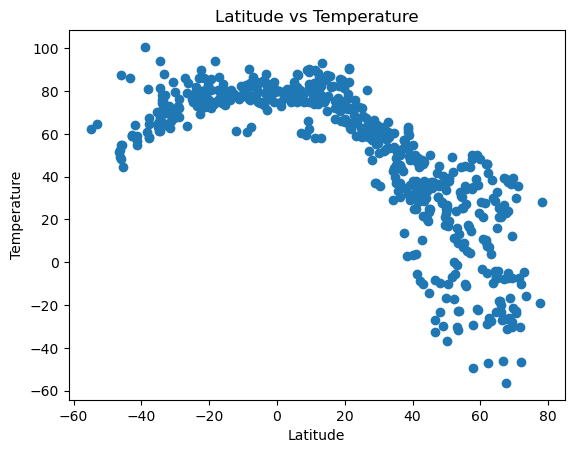

In [70]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

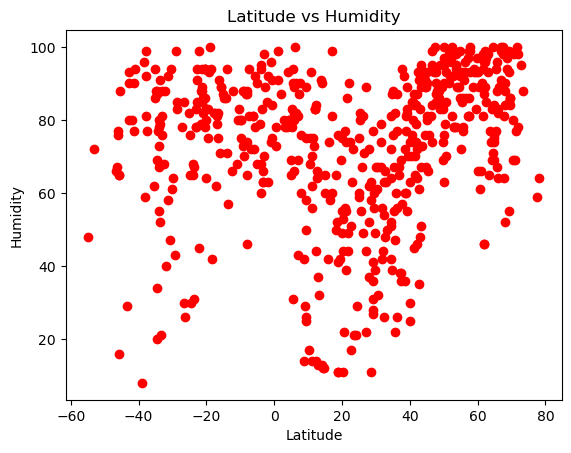

In [71]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color="red")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

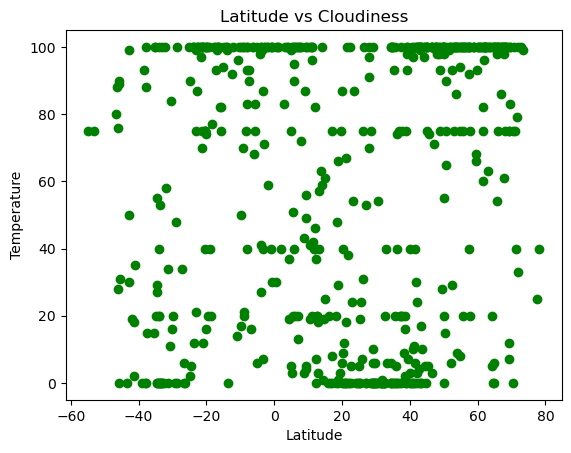

In [72]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color="green")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

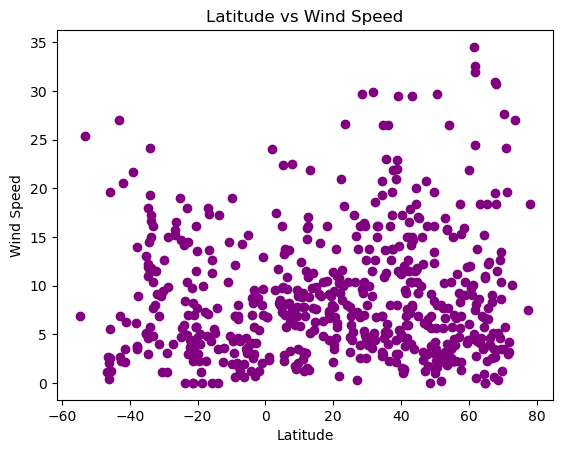

In [73]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color="purple")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def plotlinear(x, y):
    (slope, intercept, r_value, p_value, st_err)=linregress(x, y)
    print(slope, intercept, r_value)
    linear_reg_value=slope*x+intercept
    plt.scatter(x, y)
    plt.plot(x, linear_reg_value, color="red")

In [90]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-7.60,84,100,10.36,CA,1674499026
1,half moon bay,37.4636,-122.4286,57.22,36,0,19.57,US,1674498775
2,suchil,23.6333,-103.9167,65.71,21,87,26.57,MX,1674499031
3,upernavik,72.7868,-56.1549,-4.63,95,100,10.09,GL,1674499032
4,san quintin,30.4833,-115.9500,58.28,32,0,9.95,MX,1674498953


In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-7.60,84,100,10.36,CA,1674499026
1,half moon bay,37.4636,-122.4286,57.22,36,0,19.57,US,1674498775
2,suchil,23.6333,-103.9167,65.71,21,87,26.57,MX,1674499031
3,upernavik,72.7868,-56.1549,-4.63,95,100,10.09,GL,1674499032
4,san quintin,30.4833,-115.9500,58.28,32,0,9.95,MX,1674498953


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<=0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
10,puerto ayora,-0.7393,-90.3518,84.16,91,30,7.00,EC,1674499042
12,linhares,-19.3911,-40.0722,85.46,75,100,4.05,BR,1674499046
13,mar del plata,-38.0023,-57.5575,80.83,59,0,14.00,AR,1674499046
14,east london,-33.0153,27.9116,77.94,88,0,10.36,ZA,1674499048
18,arraial do cabo,-22.9661,-42.0278,85.96,78,75,10.36,BR,1674499031


###  Temperature vs. Latitude Linear Regression Plot

-1.4201900133766392 94.15244613922766 -0.8318364232632751


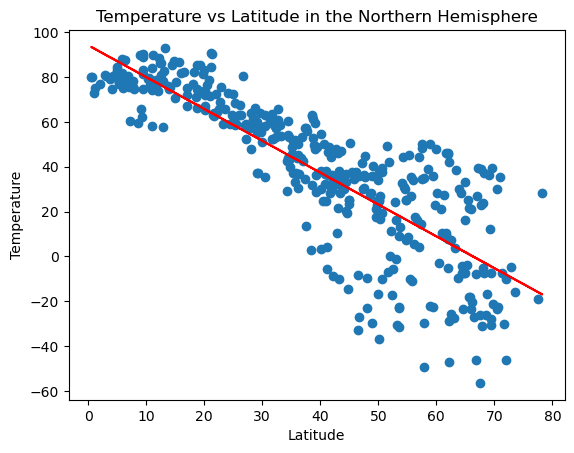

In [93]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
plotlinear(x, y)
plt.title("Temperature vs Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

0.40020324377840805 83.45768752195643 0.5629171267060552


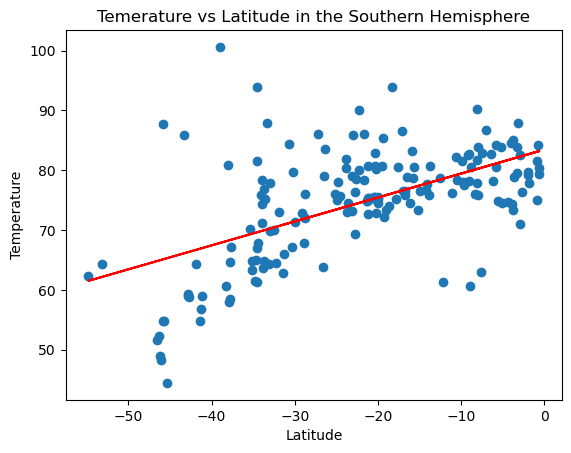

In [94]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
plotlinear(x, y)
plt.title("Temerature vs Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:** 
According to the data and scatterplots, there is a negative correlation for temperature and latitude in the Northern Hemisphere. This means that as we move further north, the maximum temperature starts to get lower. The r value is -.83 which is a strong correlation. 

For the data in the southern hemisphere, there is a positive correlation between the temperature and latitude. The r value is .56, so the correlation moderate. The relationship is such that as we move further north in the southern hemisphere, the maximum temperature also starts to rise. 

### Humidity vs. Latitude Linear Regression Plot

0.4750165541902779 53.50624906990953 0.4289461719382197


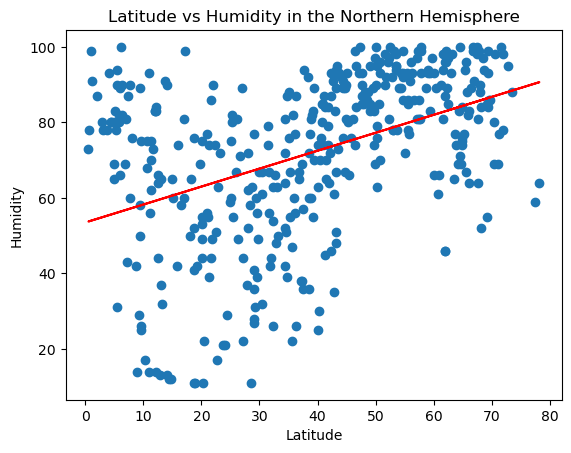

In [85]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
plotlinear(x, y)
plt.title("Latitude vs Humidity in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

0.29615558929831126 82.13813330850235 0.2186638768316886


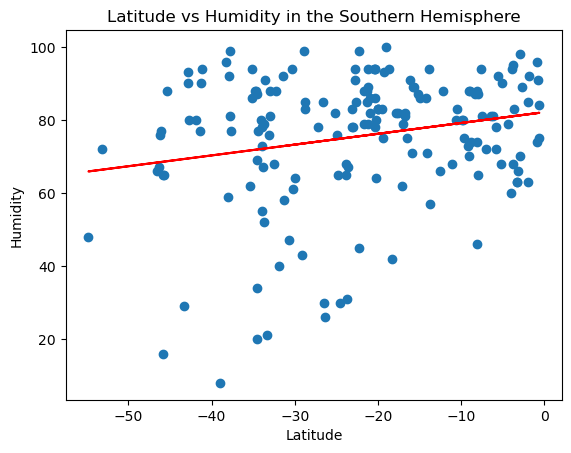

In [86]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
plotlinear(x, y)
plt.title("Latitude vs Humidity in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
According to the data and scatterplots, there is a positive correlation for humidity and latitude in the Northern Hemisphere. This means that as we move further north, the humidity starts to somewhat get higher. The r value is .42 which is a moderate correlation. 

For the data in the southern hemisphere, there is a positive correlation between the humidity and latitude. The r value is .22, so the correlation is weak. The relationship is such that as we move further north in the southern hemisphere, the humidity also starts to rise a bit. 

### Cloudiness vs. Latitude Linear Regression Plot

0.697121636628344 30.790329998566815 0.32918579983057233


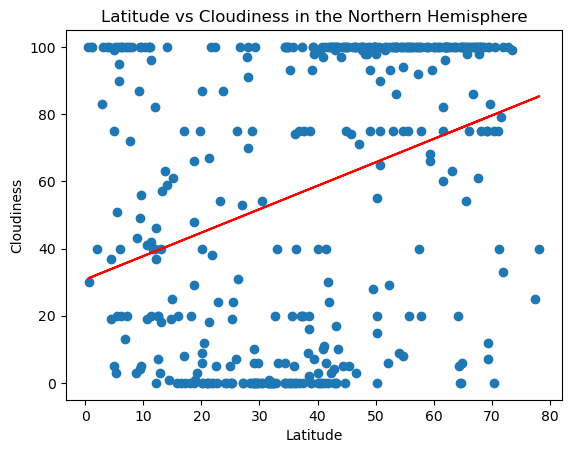

In [95]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
plotlinear(x, y)
plt.title("Latitude vs Cloudiness in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

1.0201554742622352 84.12113206349844 0.345930094358356


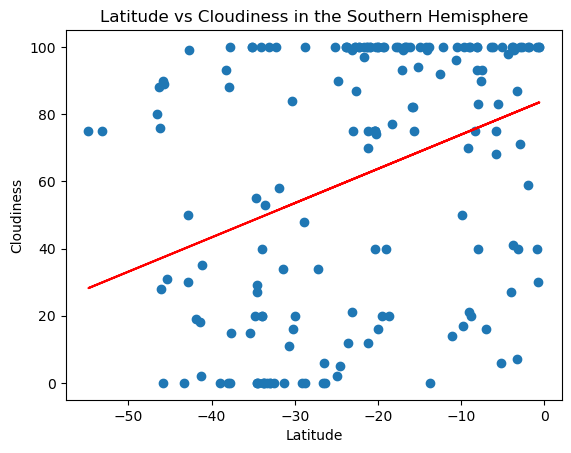

In [96]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
plotlinear(x, y)
plt.title("Latitude vs Cloudiness in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
The correlations between cloudiness and latitude in both the northern and southern hemispheres are a weak positive correlation. This means that as we move further north in both hemispheres, it gets somewhat cloudier. The r values are similar. It's .33 in the northern hemisphere and .35 in the southern.

### Wind Speed vs. Latitude Linear Regression Plot

In [98]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-7.60,84,100,10.36,CA,1674499026
1,half moon bay,37.4636,-122.4286,57.22,36,0,19.57,US,1674498775
2,suchil,23.6333,-103.9167,65.71,21,87,26.57,MX,1674499031
3,upernavik,72.7868,-56.1549,-4.63,95,100,10.09,GL,1674499032
4,san quintin,30.4833,-115.9500,58.28,32,0,9.95,MX,1674498953


0.006124484746167753 9.197479516793978 0.018065640214970435


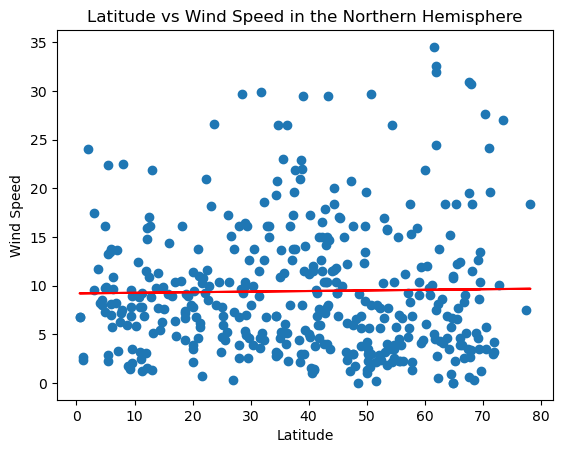

In [99]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
plotlinear(x, y)
plt.title("Latitude vs Wind Speed in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

-0.09620101811076905 5.567664093078696 -0.21977410420830323


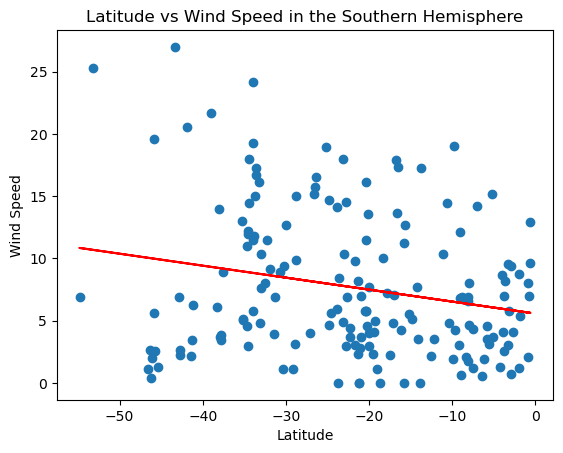

In [100]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
plotlinear(x, y)
plt.title("Latitude vs Wind Speed in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
There isn't a correlation between wind speed and latitude in the northern hemisphere. So as you move north, the wind doesn't get stronger. There is a weak negative correlation in the southern hemisphere. So as you move north, the wind gets slightly less strong. 